<a href="https://colab.research.google.com/github/manrodri/tensorflow_training/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional_neural_networks_in_tensorflow and Computer Vision

Computer Vision  is the practice of writing algorithms which can discover patterns in images, such as recognizing the cars, people, bicycles,... in a self-driving car.

In [27]:
# Import dependencies
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import zipfile
import os
import pathlib
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd

## Get the data 
The original dataset is from  https://www.vision.ee.ethz.ch/datasets_extra/food-101/, it is also available in [kaggle.com](https://www.kaggle.com/datasets/dansbecker/food-101). For simplicity and save time, udemy instructor (Daniel) did some prepocessing of the dataset (colab notebook available [here](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)).

We start working with only pizza 🍕 and steak

`pizza_steak_url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'`


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-02-17 08:19:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 64.233.191.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   189MB/s    in 0.6s    

2023-02-17 08:19:20 (189 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



 ## Inspect the data (become one with it)

 A very crucial step at the begining is really understand the data. In a computer vision problem that involves see many images.

In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [7]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [8]:
!du -h pizza_steak/

14M	pizza_steak/test/steak
15M	pizza_steak/test/pizza
29M	pizza_steak/test
40M	pizza_steak/train/steak
43M	pizza_steak/train/pizza
83M	pizza_steak/train
111M	pizza_steak/


The original food 101 dataset is 5GB in size with 101 labels and houndres of thousands images. For the sake of quick experimentation we start with only two labels and a reduce number of pictures so we can iterate and build from there. 

We experiment, we see what works and what doesn't then we use a larger dataset.


In [11]:
# Get a list of our images programatly
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize images (one way to do it) we can get the class programatically then plot images

In [15]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subfolder
class_names


array(['pizza', 'steak'], dtype='<U5')

In [16]:
# let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # read image and plot it
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img



Image shape: (512, 512, 3)


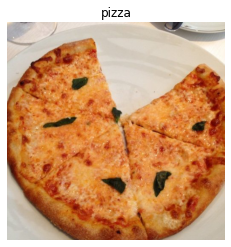

In [25]:
img = view_random_image(
    target_dir='pizza_steak/train',
    target_class='pizza'
)